In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.cluster import DBSCAN
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.linear_model import LogisticRegression

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Project_3.csv
./Project_3.ipynb
./.ipynb_checkpoints/Project_3-checkpoint.ipynb
./.ipynb_checkpoints/Project_3-checkpoint.csv
./data/hello
./data/.ipynb_checkpoints/hello-checkpoint


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [4]:
#Create an ml model that predicts whether a consumer would buy a cog

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [5]:
#Recieved and read the data from the csv file using pandas
data = pd.read_csv("Project_3.csv")
data.head()

,User ID,name,Gender,Age,EstimatedSalary,Purchased
0,10000,Billy Chavez,Male,33,75787,0
1,10001,Tyler Scott,Female,25,34033,1
2,10002,Clayton Ross,Male,41,61484,1
3,10003,Vernon Lewis,Male,51,121013,0
4,10004,Kaitlin Joseph,Male,44,47272,1


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Men Purchase Rate 0.4446601941747573
Women Purchase Rate 0.42386831275720166


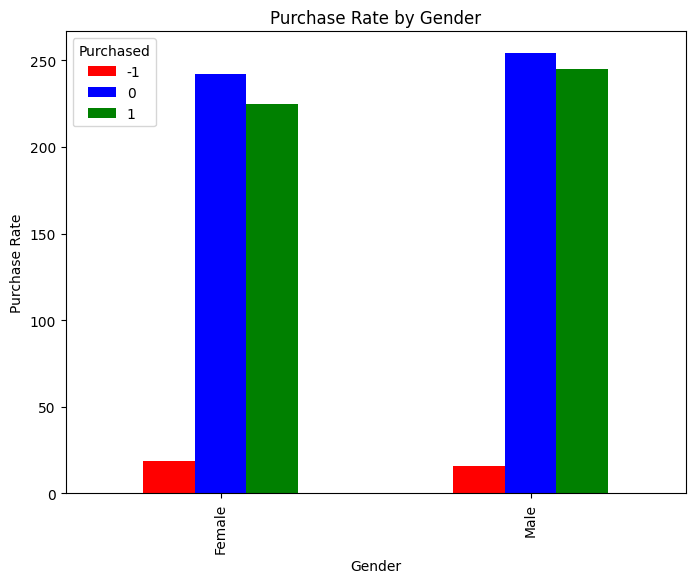

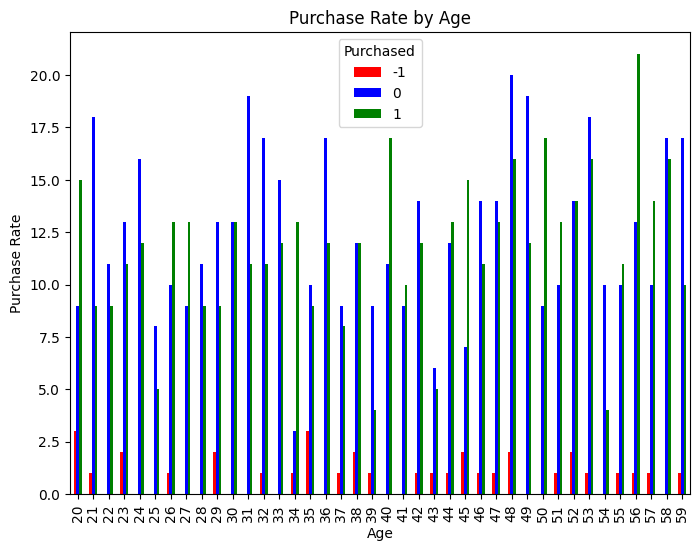

Age 56 Purchase Rate 0.5714285714285714


In [6]:
men = data.loc[data.Gender == 'Male']['Purchased']
menPurchaseRate = sum(men)/len(men)
print("Men Purchase Rate", menPurchaseRate)
women = data.loc[data.Gender == 'Female']['Purchased']
womenPurchaseRate = sum(women)/len(women)
print("Women Purchase Rate", womenPurchaseRate)

genderPurchasedRate = data.groupby(['Gender', 'Purchased']).size().unstack(fill_value=0)
genderPurchasedRate.plot(kind="bar", figsize=(8,6), color=['red', 'blue', 'green'])

plt.title('Purchase Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Rate')
plt.show()

agePurchasedRate = data.groupby(['Age', 'Purchased']).size().unstack(fill_value=0)
agePurchasedRate.plot(kind="bar", figsize=(8,6), color=['red', 'blue', 'green'])

plt.title('Purchase Rate by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Rate')
plt.show()

age56 = data.loc[data.Age == 56]['Purchased']
print("Age 56 Purchase Rate", sum(age56)/len(age56))

#Some ages disproportionately buy more cogs than other while gender is fairly equal




# 4.Prepare the Data


Apply any data transformations and explain what and why


In [11]:
#Converts the data to variables for training and removes the data that contains no values
x = data[['Age', 'EstimatedSalary']].dropna()
y = data.loc[x.index, 'Purchased']

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [53]:
#Splits the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

#Creates standard scaler 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


randomSearch.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [15, 20, 25],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400]},
                   random_state=42, scoring='neg_mean_squared_error')

In [14]:
#Testing K Nearest Neighbor
knnModel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knnModel.fit(x_train_scaled, y_train)
knnAccuracy = knnModel.score(x_test_scaled, y_test)
print("KNN Accuracy", knnAccuracy)
print("KNN Accuracy a Little Better")

KNN Accuracy 0.4427860696517413
KNN Accuracy a Little Better


In [38]:
#Testing SVM
svmModel = SVC(kernel = 'rbf', gamma = 'auto')
svmModel.fit(x_train_scaled, y_train)
svmAccuracy = svmModel.score(x_test_scaled, y_test)
print("SVM Accuracy", svmAccuracy)
print("SVM Accuracy More than 50%")

SVM Accuracy 0.5323383084577115
SVM Accuracy More than 50%


In [58]:
#Scaling NB Model since it doesn't take negative values
scaler = MinMaxScaler()
x_min_max_train = scaler.fit_transform(x_train_scaled)
x_min_max_test = scaler.fit_transform(x_test_scaled)

nbModel = MultinomialNB(alpha = 0.1, class_prior = None, fit_prior = True)
nbModel.fit(x_min_max_train, y_train)
nbModelAccuracy = nbModel.score(x_min_max_test, y_test)
print("NB Model Accuracy", nbModelAccuracy)
print("Accuracy Similar to SVM")

NB Model Accuracy 0.5323383084577115
Accuracy Similar to SVM


In [65]:
#Testing logistic
logModel = LogisticRegression()
logModel.fit(x_train_scaled,y_train)
logAccuracy = logModel.score(x_test_scaled, y_test)
print("Logarithmic Accuracy", logAccuracy)
#Worse than SVM and Naive Bayes but better than KNN 

Logarithmic Accuracy 0.5124378109452736


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [72]:
#Uses best estimator to find the best paramters for training random forest
randomForestBestAttribute = randomSearch.best_estimator_

trainingAccuracy = randomForestBestAttribute.score(x_train_scaled, y_train)
print("Random Forest Training Accuracy:", trainingAccuracy)
testAccuracy = randomForestBestAttribute.score(x_test_scaled, y_test)
print("Random Forest Testing Accuracy:", testAccuracy)
print("Random Forest Not Very Accurate")

Random Forest Training Accuracy: 0.3196279126388397
Random Forest Testing Accuracy: -0.09929477991795199
Random Forest Not Very Accurate


In [73]:
#Fine tuned SVM
fineTunedSVM = SVC(kernel = 'sigmoid', gamma = 'auto')
fineTunedSVM.fit(x_train_scaled, y_train)
finesvmAccuracy = fineTunedSVM.score(x_test_scaled, y_test)
print("Fined Tuned Accuracy", finesvmAccuracy)
print("SVM Accuracy Increased")

Fined Tuned Accuracy 0.5621890547263682
SVM Accuracy Increased


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 